In [5]:
import axelrod as axl
import pandas as pd

from keras.models import load_model

In [6]:
import numpy as np

In [7]:
import imp

player_class = imp.load_source('player_class', 'player_class.py')

In [8]:
axl.__version__

'4.2.0'

**the trained model**

**from GPU**

In [21]:
# from keras.layers import LSTM, Dense, Dropout, TimeDistributed, CuDNNLSTM
# from keras.models import Sequential

In [22]:
# num_hidden_cells = 200
# drop_out_rate = 0.2

# model = Sequential()

# model.add(
#         LSTM(200, return_sequences=True, input_shape=(None, 1))
#     )

# model.add(Dropout(rate=drop_out_rate))

# model.add(Dense(1, activation="sigmoid"))
# model.compile(
#     loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
# )

# model.load_weights('best_weights.h5')

In [23]:
model = load_model('output/lstm_model_200_10_1000.h5')

In [24]:
sequence = np.array([0, 0, 0, 0, 0, 0, 0])

In [25]:
model.predict(sequence.reshape(1, len(sequence), 1))

array([[[0.09714931],
        [0.00608641],
        [0.03414666],
        [0.09397501],
        [0.20948003],
        [0.14332488],
        [0.06536125]]], dtype=float32)

**create player**

In [26]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_simple_model)

**check that can interact with other players**

In [27]:
match = axl.Match([player, axl.Defector()], turns=200)
_ = match.play()

**in a tournament with basic strategies**

In [28]:
strategies = [s() for s in axl.basic_strategies] + [player]

In [30]:
player.match_attributes

{'game': Axelrod game: (R,P,S,T) = (3, 1, 0, 5), 'length': 200, 'noise': 0}

In [31]:
tournament = axl.Tournament(players=strategies, turns=205, repetitions=5)

In [32]:
results = tournament.play()



Playing matches:   0%|          | 0/78 [00:00<?, ?it/s]

Playing matches:  14%|█▍        | 11/78 [00:00<00:00, 103.84it/s]

Playing matches:  19%|█▉        | 15/78 [00:02<00:10,  6.08it/s] 

Playing matches:  29%|██▉       | 23/78 [00:04<00:10,  5.18it/s]

Playing matches:  42%|████▏     | 33/78 [00:06<00:08,  5.09it/s]

Playing matches:  54%|█████▍    | 42/78 [00:08<00:07,  4.69it/s]

Playing matches:  64%|██████▍   | 50/78 [00:10<00:06,  4.43it/s]

Playing matches:  73%|███████▎  | 57/78 [00:12<00:05,  4.16it/s]

Playing matches:  81%|████████  | 63/78 [00:14<00:03,  3.78it/s]

Playing matches:  87%|████████▋ | 68/78 [00:16<00:02,  3.34it/s]

Playing matches:  92%|█████████▏| 72/78 [00:18<00:02,  2.84it/s]

Playing matches:  96%|█████████▌| 75/78 [00:20<00:01,  2.27it/s]

Playing matches:  99%|█████████▊| 77/78 [00:22<00:00,  1.67it/s]

Playing matches: 100%|██████████| 78/78 [00:26<00:00,  1.60s/it]



Analysing:   0%|          | 0/25 [00:00<?, ?it/s]//anaconda3/envs/rnn/lib/pytho

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


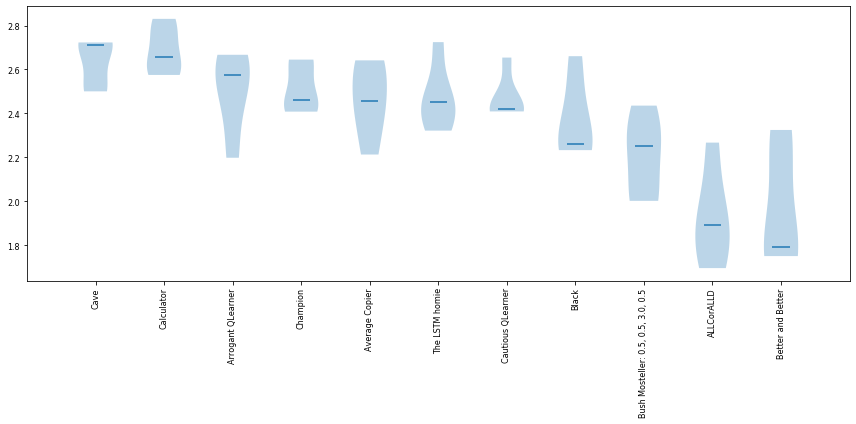

In [39]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [34]:
filterset = {
         'stochastic': True,
        'long_run_time': False,
}
strategies_list = axl.filtered_strategies(filterset)

In [35]:
len(strategies_list)

66

In [36]:
strategies = [s() for s in strategies_list[:10]] + [player]

In [37]:
tournament = axl.Tournament(players=strategies, turns=205, repetitions=5)
results = tournament.play()



Playing matches:   0%|          | 0/66 [00:00<?, ?it/s]

Playing matches:   8%|▊         | 5/66 [00:00<00:01, 38.78it/s]

Playing matches:  17%|█▋        | 11/66 [00:10<00:30,  1.82it/s]

Playing matches:  21%|██        | 14/66 [00:10<00:20,  2.52it/s]

Playing matches:  24%|██▍       | 16/66 [00:11<00:14,  3.38it/s]

Playing matches:  29%|██▉       | 19/66 [00:11<00:10,  4.56it/s]

Playing matches:  32%|███▏      | 21/66 [00:22<01:21,  1.81s/it]

Playing matches:  36%|███▋      | 24/66 [00:22<00:53,  1.27s/it]

Playing matches:  44%|████▍     | 29/66 [00:22<00:33,  1.11it/s]

Playing matches:  48%|████▊     | 32/66 [00:34<01:03,  1.86s/it]

Playing matches:  55%|█████▍    | 36/66 [00:34<00:39,  1.31s/it]

Playing matches:  58%|█████▊    | 38/66 [00:46<01:15,  2.71s/it]

Playing matches:  59%|█████▉    | 39/66 [00:46<00:51,  1.93s/it]

Playing matches:  62%|██████▏   | 41/66 [00:46<00:34,  1.37s/it]

Playing matches:  65%|██████▌   | 43/66 [00:47<00:22,  1.02it/s]

Playing matches:  

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


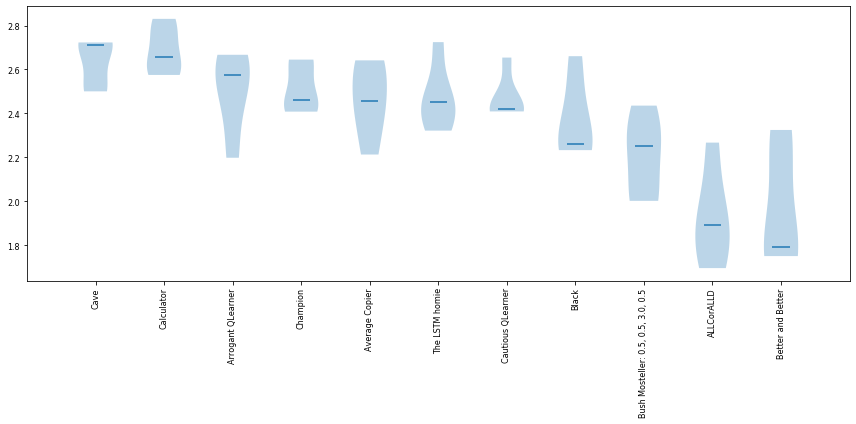

In [38]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Axelrod's first tournament**

In [24]:
strategies = [axl.TitForTat(), axl.TidemanAndChieruzzi(), axl.Nydegger(), axl.Grofman(),
              axl.Shubik(), axl.SteinAndRapoport(), axl.Grudger(), axl.Davis(),
              axl.RevisedDowning(), axl.Feld(), axl.Joss(),
              axl.Tullock(), axl.UnnamedStrategy(), axl.Random()] + [player]

In [25]:
tournament = axl.Tournament(players=strategies, turns=205, repetitions=5)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 93.72it/s]


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


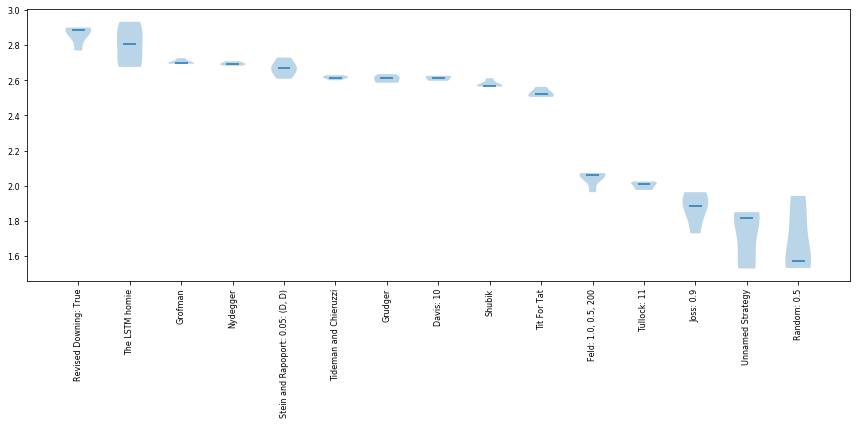

In [26]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Press and Dyson's tournament**

In [27]:
strategoes = [axl.Cooperator(),
                axl.Defector(),
                axl.ZDExtort2(),
                axl.HardGoByMajority(),
                axl.Joss(),
                axl.HardTitForTat(),
                axl.HardTitFor2Tats(),
                axl.TitForTat(),
                axl.Grudger(),
                axl.GTFT(),
                axl.TitFor2Tats(),
                axl.WinStayLoseShift(),
                axl.Random(),
                axl.ZDGTFT2()] + [player]

In [28]:
tournament = axl.Tournament(players=strategies, turns=205, repetitions=5)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 101.40it/s]


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


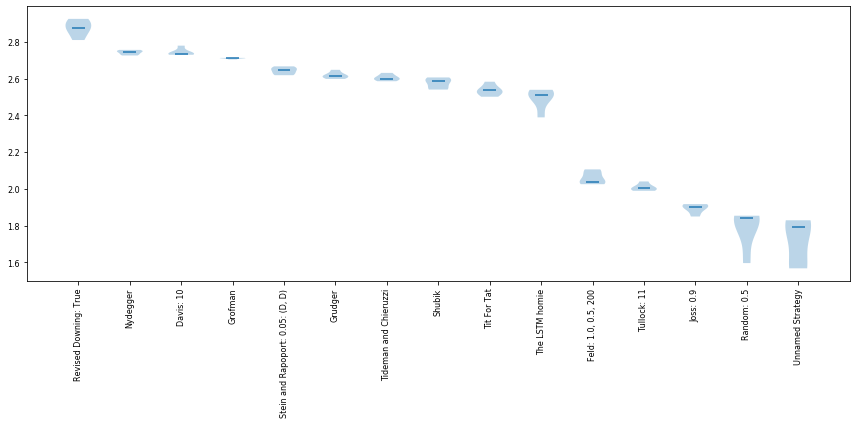

In [29]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()